In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [140]:
path = "./data/"
books_df = pd.read_csv(path + "books.csv")
users_df = pd.read_csv(path + "users.csv")
rating_df = pd.read_csv(path + "train_ratings.csv")

In [141]:
print("books_df  : ",books_df.columns)
print("users_df  : ",users_df.columns)
print("rating_df  : ",rating_df.columns)

books_df  :  Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'img_url', 'language', 'category', 'summary', 'img_path'],
      dtype='object')
users_df  :  Index(['user_id', 'location', 'age'], dtype='object')
rating_df  :  Index(['user_id', 'isbn', 'rating'], dtype='object')


In [142]:
user_rating_df = pd.merge(users_df, rating_df, how='inner', on='user_id')
data = pd.merge(user_rating_df, books_df, how='inner', on='isbn')
data.head(3)

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,8,"timmins, ontario, canada",NaN,0002005018,4,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,67544,"toronto, ontario, canada",30.0,0002005018,7,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
2,123629,"kingston, ontario, canada",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg


In [143]:
data['location'] = data['location'].str.replace(r'[^0-9a-zA-Z:,]', '') # 특수문자 제거

data['location_city'] = data['location'].apply(lambda x: x.split(',')[0].strip())
data['location_state'] = data['location'].apply(lambda x: x.split(',')[1].strip())
data['location_country'] = data['location'].apply(lambda x: x.split(',')[2].strip())

data = data.replace('na', np.nan) #특수문자 제거로 n/a가 na로 바뀌게 되었습니다. 따라서 이를 컴퓨터가 인식할 수 있는 결측값으로 변환합니다.
data = data.replace('', np.nan) # 일부 경우 , , ,으로 입력된 경우가 있었으므로 이런 경우에도 결측값으로 변환합니다.

data.drop('location', axis=1, inplace=True)

/tmp/ipykernel_8343/322630745.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['location'] = data['location'].str.replace(r'[^0-9a-zA-Z:,]', '') # 특수문자 제거


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306795 entries, 0 to 306794
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              306795 non-null  int64  
 1   age                  214133 non-null  float64
 2   isbn                 306795 non-null  object 
 3   rating               306795 non-null  int64  
 4   book_title           306795 non-null  object 
 5   book_author          306795 non-null  object 
 6   year_of_publication  306795 non-null  float64
 7   publisher            306795 non-null  object 
 8   img_url              306795 non-null  object 
 9   language             187711 non-null  object 
 10  category             185574 non-null  object 
 11  summary              187711 non-null  object 
 12  img_path             306795 non-null  object 
 13  location_city        299787 non-null  object 
 14  location_state       290385 non-null  object 
 15  location_country 

In [145]:
data.isna().sum()

user_id                     0
age                     92662
isbn                        0
rating                      0
book_title                  0
book_author                 0
year_of_publication         0
publisher                   0
img_url                     0
language               119084
category               121221
summary                119084
img_path                    0
location_city            7008
location_state          16410
location_country        14072
dtype: int64

In [146]:
data['rating'].value_counts().sort_index(ascending=False)

10    42774
9     48673
8     73593
7     52928
6     25311
5     14111
4     12707
3     10520
2     12929
1     13249
Name: rating, dtype: int64

In [147]:
data[data['age'].isna()].head(5)

,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,location_city,location_state,location_country
0,8,NaN,0002005018,4,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,timmins,ontario,canada
2,123629,NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,kingston,ontario,canada
3,200273,NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,comber,ontario,canada
4,210926,NaN,0002005018,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,guelph,ontario,canada
7,8,NaN,074322678X,4,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.0...,en,['Fiction'],"Now back in print, Ann Beattie&#39;s finest sh...",images/074322678X.01.THUMBZZZ.jpg,timmins,ontario,canada


In [148]:
data.drop(columns = ["img_path","img_url"], inplace=True)

<AxesSubplot: >

<Figure size 800x500 with 0 Axes>

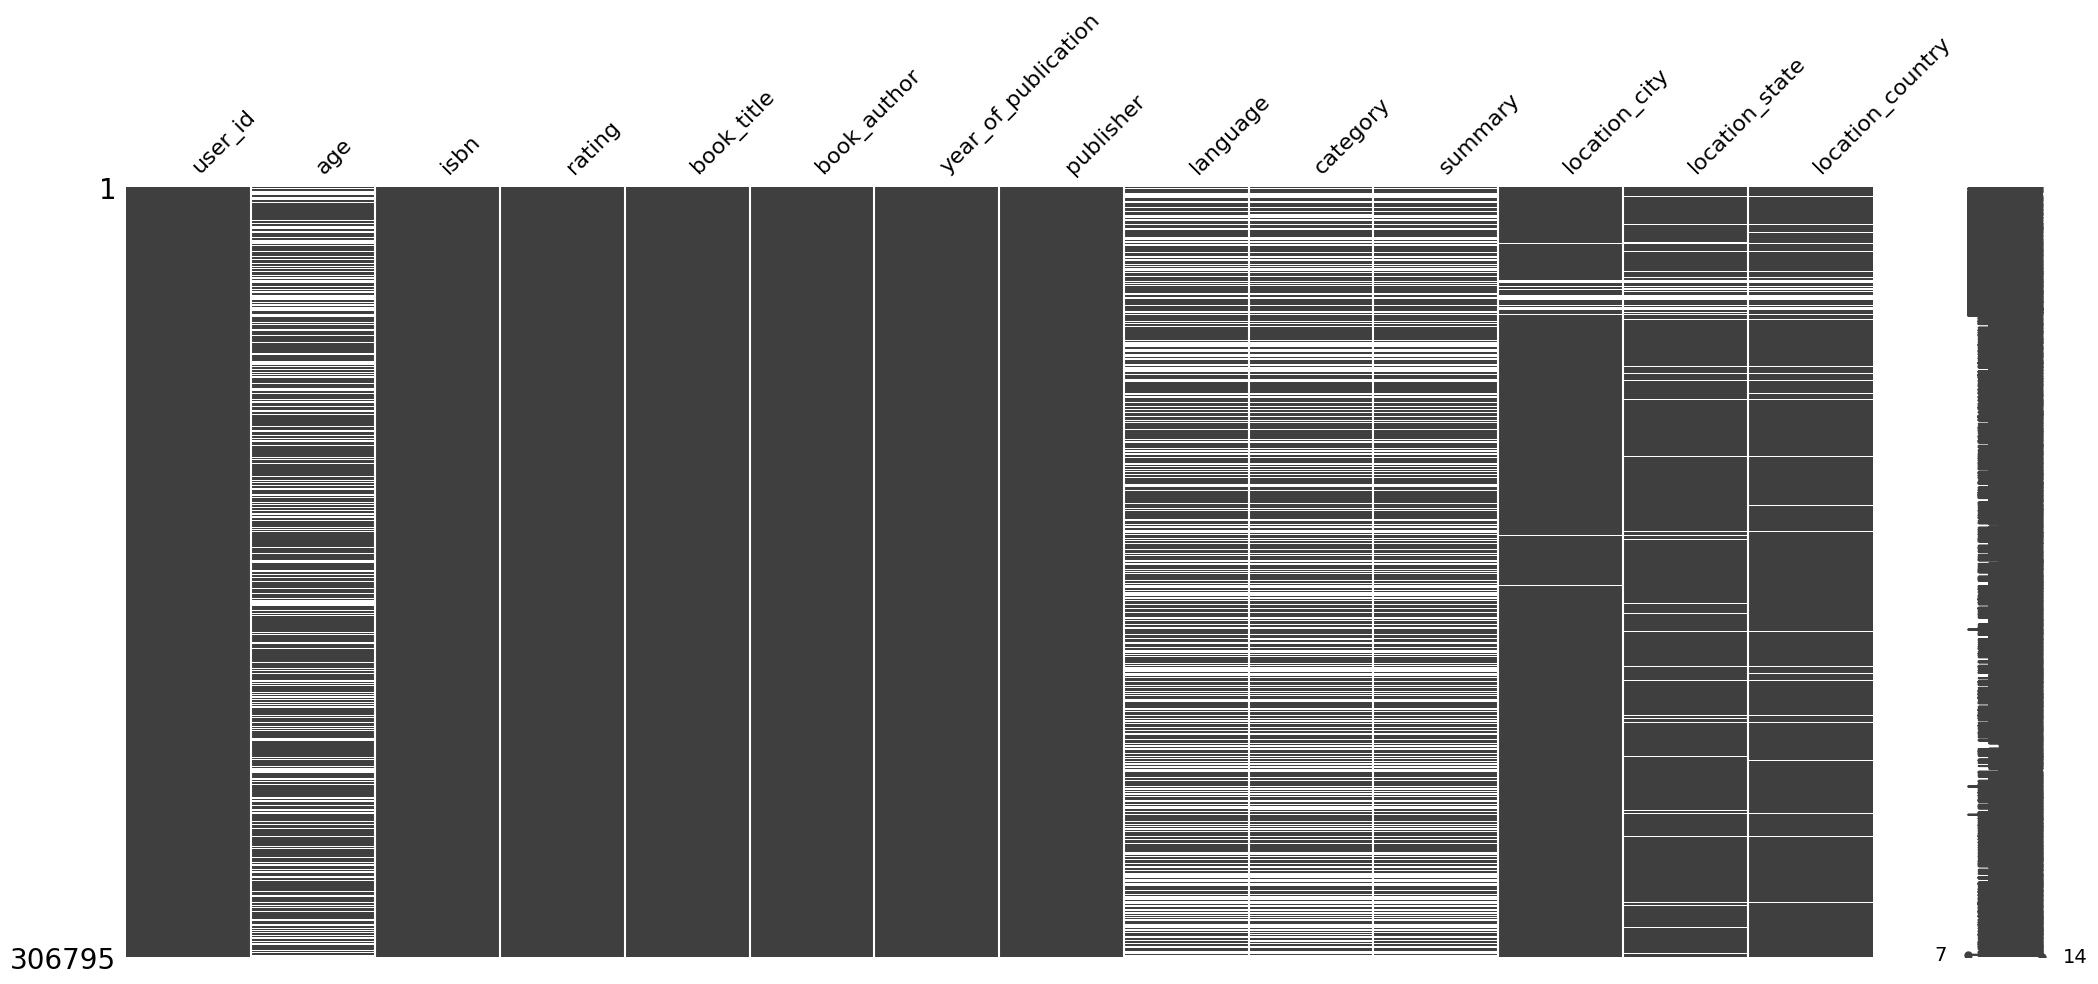

In [149]:
plt.figure(figsize=(8,5))
msno.matrix(data)

## 나이와 점수 & 책의 관계

In [155]:
data2 = data[~data['age'].isna()][['age', 'rating', 'year_of_publication', 'language', 'category']]
data2

,age,rating,year_of_publication,language,category
1,30.0,7,2001.0,en,['Actresses']
5,60.0,7,2001.0,en,['Actresses']
6,27.0,5,2001.0,en,['Actresses']
13,49.0,9,2003.0,en,['Fiction']
15,36.0,9,2003.0,en,['Fiction']
...,...,...,...,...,...
306789,46.0,3,1987.0,en,['Science']
306790,54.0,7,2004.0,NaN,NaN
306791,74.0,8,1999.0,en,"['Authors, Canadian (English) 20th century Bio..."
306793,33.0,10,1981.0,NaN,NaN


In [158]:
def age_map(x: int) -> int:
    x = int(x)
    if x < 20:
        return 1
    elif x >= 20 and x < 30:
        return 2
    elif x >= 30 and x < 40:
        return 3
    elif x >= 40 and x < 50:
        return 4
    elif x >= 50 and x < 60:
        return 5
    else:
        return 6

In [162]:
data2['age_cat'] = data2['age'].apply(lambda x : age_map(x))
data2

,age,rating,year_of_publication,language,category,age_cat
1,30.0,7,2001.0,en,['Actresses'],3
5,60.0,7,2001.0,en,['Actresses'],6
6,27.0,5,2001.0,en,['Actresses'],2
13,49.0,9,2003.0,en,['Fiction'],4
15,36.0,9,2003.0,en,['Fiction'],3
...,...,...,...,...,...,...
306789,46.0,3,1987.0,en,['Science'],4
306790,54.0,7,2004.0,NaN,NaN,5
306791,74.0,8,1999.0,en,"['Authors, Canadian (English) 20th century Bio...",6
306793,33.0,10,1981.0,NaN,NaN,3


In [202]:
t = data2[['age_cat','rating']].value_counts().to_frame().reset_index()
t = t.rename(columns={0:"cnt"})
t
# t = t.groupby(['age_cat', 'rating']).sum().reset_index()

,age_cat,rating,cnt
0,3,8,15682
1,2,8,13229
2,3,7,11514
3,4,8,11157
4,3,9,10637
5,2,7,9877
6,3,10,9718
7,2,9,9187
8,2,10,8679
9,4,9,7410


<AxesSubplot: xlabel='rating', ylabel='cnt'>

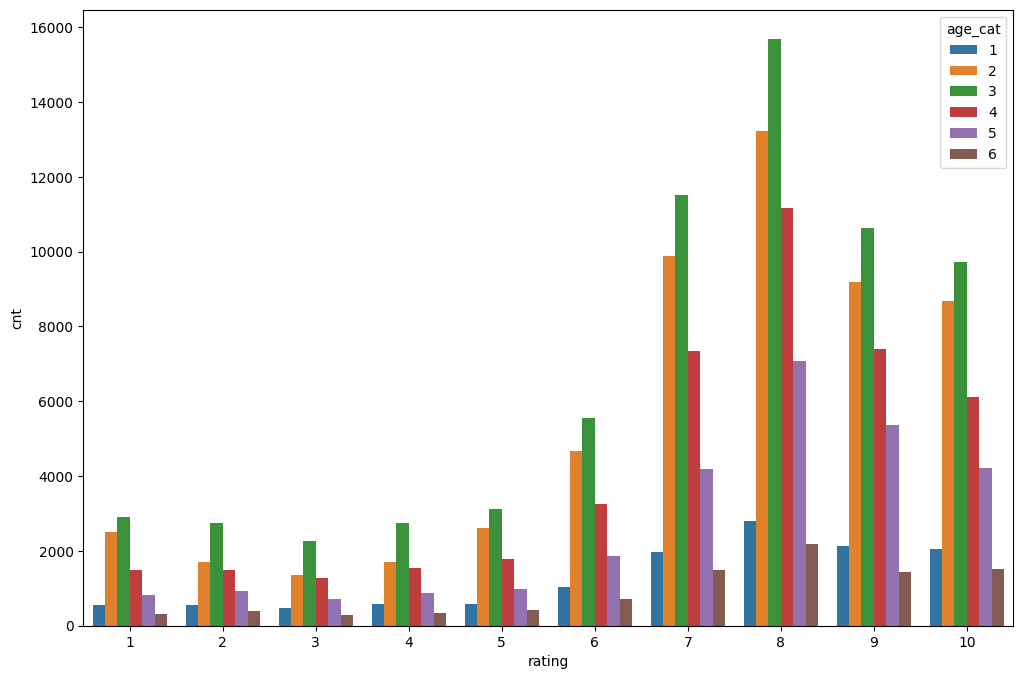

In [205]:
plt.figure(figsize=(12,8))
sns.barplot(data=t, x='rating', y='cnt', hue='age_cat')

## age 결측값 어떻게 처리할지
어떤 애들이 age가 빠져있는지 확인해보기..

1. age가 null인 사람들이 읽은 책을 가장 많이 본 나이 최빈/평균으로 채우기
2. 장르로 구분?
3. 국가별 최빈/평균 값으로 대처?
4. 나이대 전체에서 최빈값으로 대처?

### 1. age가 null인 사람들이 읽은 책을 가장 많이 본 나이 최빈/평균으로 채우기

In [16]:
non_age_df = data[data['age'].isna()]
age_df = data[~data['age'].isna()]
display(age_df.head(2))
display(non_age_df.head(2))

,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,language,category,summary,location_city,location_state,location_country
1,67544,30.0,0002005018,7,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",toronto,ontario,canada
5,219008,60.0,0002005018,7,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",halifax,novascotia,canada


,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,language,category,summary,location_city,location_state,location_country
0,8,NaN,0002005018,4,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",timmins,ontario,canada
2,123629,NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",kingston,ontario,canada


In [17]:
# 혹시라도 데이터가 이상하게 들어와있는 경우 확인
# 일단 아이디에 나이가 있는 것도 있고 없는 것도 있는 경우는 x
non_age_df_userID = pd.Series(non_age_df['user_id'].unique())
age_df_userID = pd.Series(age_df['user_id'].unique())
age_df_userID[age_df_userID.isin(non_age_df_userID)]

Series([], dtype: int64)

In [18]:
# age가 null인 사람들이 읽은 책 내림차순 정렬
non_age_df.groupby(['isbn', 'book_title']).count()['user_id'].sort_values(ascending=False).to_frame()

,,user_id
isbn,book_title,
0316666343,The Lovely Bones: A Novel,189
0312195516,The Red Tent (Bestselling Backlist),125
044023722X,A Painted House,100
067976402X,Snow Falling on Cedars,99
0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,95
...,...,...
0446677949,The Fountains of Paradise,1
0446678031,Skin Folk,1
0446678139,Last Refuge of Scoundrels : A Revolutionary Novel,1


1번을 기준으로 최빈값이나 평균값으로 적당히 채운다 치면 그 책을 읽은 사람의 나이가 있는지 없는지 비율을 보고 판단해야 될 듯함

In [19]:
d1 = data.groupby(['isbn']).count()['user_id']
d2 = non_age_df.groupby(['isbn', 'book_title']).count()['user_id'].sort_values(ascending=False).to_frame()

In [20]:
d3 = d1.reset_index()
d4 = d2.reset_index()[['isbn','user_id']]
d5 = pd.merge(d3,d4,how='inner',on='isbn')
d5['perc'] = d5['user_id_y'] / d5['user_id_x']
d5.rename(columns={"user_id_x":"total_read_cnt", "user_id_y" : "non_age_cnt"}, inplace=True)
d5 = d5.sort_values(by='perc', ascending=True)

print("age가 있는 사람들이 읽은 책 중 age가 없는 사람이 읽은 책 cnt수 : ",len(d5))
print("age가 없는 사람만 읽은 책의 cnt 수 : ", len(d5[d5['perc'] == 1]))

age가 있는 사람들이 읽은 책 중 age가 없는 사람이 읽은 책 cnt수 :  51332
age가 없는 사람만 읽은 책의 cnt 수 :  27090


In [21]:
d5[d5['perc'] == 1]

,isbn,total_read_cnt,non_age_cnt,perc
51203,903880282X,1,1,1.0
35242,0767905075,1,1,1.0
48790,3404605047,1,1,1.0
48997,3426615223,1,1,1.0
51095,8817114006,1,1,1.0
...,...,...,...,...
23774,0517543052,2,2,1.0
23771,0517541475,1,1,1.0
23770,0517540312,1,1,1.0
23911,0517703084,1,1,1.0


결론 -> 27090명의 사람에 대해서 책을 읽은 사람들의 평균/최빈값으로 대처할 수 없음

In [22]:
d5[d5['perc']!= 1]
data[data['isbn'] == '0517543052']

,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,language,category,summary,location_city,location_state,location_country
248365,187410,NaN,0517543052,9,Be Here Now,Lama Foundation Editor,1971.0,Three Rivers Press (CA),en,"['Body, Mind & Spirit']",This book is enhanced with content such as aud...,kansascity,NaN,usa
248366,207562,NaN,0517543052,7,Be Here Now,Lama Foundation Editor,1971.0,Three Rivers Press (CA),en,"['Body, Mind & Spirit']",This book is enhanced with content such as aud...,sandiego,california,usa


In [104]:
def fillAge(idx):
    global data
    d2 = data.drop(idx, axis=0)
    d2 = d2.groupby('isbn').aggregate({"age":np.average})
    d2['age'] = d2['age'].astype(int)
    
    avg_age = {}
    for i, isbn in data.loc[idx,'isbn'].items():
        try: 
            avg_age[i] = d2.loc[isbn, 'age']
        except:
            pass
        
    avg_age = pd.DataFrame(avg_age, index=[0]).T
    avg_age.rename(columns={0:"avgAge"}, inplace=True)
    return avg_age

In [105]:
age_na_idx = data[data['age'].isna()].index

In [106]:
a = fillAge(age_na_idx)
a

,avgAge
0,39
2,39
3,39
4,39
14,40
...,...
305883,32
305935,28
305980,30
305984,52


In [111]:
data.loc[a.index, 'age'] = a['avgAge'].apply(lambda x: x)
data.loc[age_na_idx].head(5)

,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,language,category,summary,location_city,location_state,location_country
0,8,39.0,0002005018,4,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",timmins,ontario,canada
2,123629,39.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",kingston,ontario,canada
3,200273,39.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",comber,ontario,canada
4,210926,39.0,0002005018,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",guelph,ontario,canada
7,8,NaN,074322678X,4,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,en,['Fiction'],"Now back in print, Ann Beattie&#39;s finest sh...",timmins,ontario,canada


In [112]:
data['age'].isna().sum()

29817

## Category

In [114]:
import re
data.loc[data[data['category'].notnull()].index, 'category'] = data[data['category'].notnull()]['category'].apply(lambda x: re.sub('[\W_]+',' ',x).strip())

In [115]:
data['category'].value_counts()

Fiction                                            108569
Juvenile Fiction                                    12019
Biography Autobiography                              7648
Humor                                                3132
History                                              2672
                                                    ...  
Animals in literature                                   1
Jockeys                                                 1
Fables American                                         1
Washington Territory                                    1
Authors Canadian English 20th century Biography         1
Name: category, Length: 3742, dtype: int64

In [116]:
data['category'] = data['category'].str.lower()

In [117]:
data['category'].value_counts()

fiction                                            108998
juvenile fiction                                    12099
biography autobiography                              7693
humor                                                3132
history                                              2740
                                                    ...  
jockeys                                                 1
fables american                                         1
washington territory                                    1
auctions                                                1
authors canadian english 20th century biography         1
Name: category, Length: 3715, dtype: int64

In [120]:
category_df = pd.DataFrame(data['category'].value_counts()).reset_index()
category_df.columns = ['category','count']
category_df.head()

,category,count
0,fiction,108998
1,juvenile fiction,12099
2,biography autobiography,7693
3,humor,3132
4,history,2740


In [121]:
category_df.describe()

,count
count,3715.000000
mean,49.952624
std,1807.126370
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,108998.000000


In [124]:
category_df['category'].nunique()

3715

In [122]:
category_df[category_df['count']>=50]

,category,count
0,fiction,108998
1,juvenile fiction,12099
2,biography autobiography,7693
3,humor,3132
4,history,2740
...,...,...
115,murder,51
116,amsterdam netherlands,51
117,boston mass,50
118,humorous stories,50


카테고리를 보면 3000개가 넘는 종류를 갖고 있습니다.

그러나 이 중 10개 이상의 중복을 갖는 카테고리가 50개가 안되는것을 통해, 많은 카테고리가 그룹화 안된 채로 존재한다고 볼 수 있습니다.

또한 일부 카테고리의 경우 전기&자서전 카테고리와 전기, 자서전 이렇게 나눠져 있는 경우가 있습니다. 

이러한 카테고리를 좀더 큰 카테고리로 묶어주는 과정을 시도하여 카테고리의 가짓수를 줄일 수 있습니다.

본 과정은 여러분들이 EDA를 진행하는 과정에서 더 많은 시도를 해볼 수 있을 것으로 생각됩니다.


상위 카테고리를 만들어보겠습니다.

In [29]:
# data['category_high'] = data['category'].copy()
# data.loc[data[data['category']=='biography'].index, 'category_high'] = 'biography autobiography'
# data.loc[data[data['category']=='autobiography'].index,'category_high'] = 'biography autobiography'

하나씩 찾아서 변경하기엔 너무 많은 자료양을 갖고 있습니다. 

따라서 이런식으로 해당 단어를 포함하는 경우 전체를 바꿀 수 있습니다.

In [30]:
# data[data['category'].str.contains('history', na=False)]['category'].unique()

array(['history', 'natural history', 'oral history', 'history modern',
       'constitutional history', 'church history', 'world history'],
      dtype=object)

In [31]:
# data.loc[data[data['category'].str.contains('history',na=False)].index,'category_high'] = 'history'

이렇게 바꾸기에도 방대한 양을 가지고 있으므로 반복문을 통해 몇가지 카테고리들을 처리하는 예시를 보여드리겠습니다.

In [32]:
# custom_categories = ['garden','crafts','physics','adventure','music','fiction','nonfiction','science','science fiction','social','homicide',
#  'sociology','disease','religion','christian','philosophy','psycholog','mathemat','agricult','environmental',
#  'business','poetry','drama','literary','travel','motion picture','children','cook','literature','electronic',
#  'humor','animal','bird','photograph','computer','house','ecology','family','architect','camp','criminal','language','india']

# a = pd.Series(["Fiction",
# "Nonfiction",
# "Action and adventure",
# "Art/architecture",
# "Alternate history",
# "Autobiography",
# "Anthology",
# "Biography",
# "Chick lit",
# "Business/economics",
# "Childrens",
# "Crafts/hobbies",
# "Classic",
# "Cookbook",
# "Comic book",
# "Diary",
# "Coming-of-age",
# "Dictionary",
# "Crime",
# "Encyclopedia",
# "Drama",
# "Guide",
# "Fairytale",
# "Health/fitness",
# "Fantasy",
# "History",
# "Graphic novel",
# "Home and garden",
# "Historical fiction",
# "Humor",
# "Horror",
# "Journal",
# "Mystery",
# "Math",
# "Paranormal romance",
# "Memoir",
# "Picture book",
# "Philosophy",
# "Poetry",
# "Prayer",
# "Political thriller",
# "Religion, spirituality, and new age",
# "Romance",
# "Textbook",
# "Satire",
# "True crime",
# "Science fiction",
# "Review",
# "Short story",
# "Science",
# "Suspense",
# "Self help",
# "Thriller",
# "Sports and leisure",
# "Western",
# "Travel",
# "Young adult",
# "True crime"])

# a = a.apply(lambda x: re.sub('[\W_]+',' ',x).strip())
# a = a.str.lower()

In [126]:
category_df = category_df[category_df['count']>=50]
categories = category_df['category']

In [127]:
# categories = ['garden','crafts','physics','adventure','music','fiction','nonfiction','science','science fiction','social','homicide',
#  'sociology','disease','religion','christian','philosophy','psycholog','mathemat','agricult','environmental',
#  'business','poetry','drama','literary','travel','motion picture','children','cook','literature','electronic',
#  'humor','animal','bird','photograph','computer','house','ecology','family','architect','camp','criminal','language','india']

for category in categories:
    data.loc[data[data['category'].str.contains(category,na=False)].index,'category_high'] = category

In [128]:
category_high_df = pd.DataFrame(data['category_high'].value_counts()).reset_index()
category_high_df.columns = ['category','count']
category_high_df.head(10)

,category,count
0,fiction,109520
1,juvenile fiction,12102
2,biography autobiography,7693
3,humor,3168
4,history,2762
5,religion,2407
6,science,2403
7,body mind spirit,1738
8,juvenile nonfiction,1660
9,family relationships,1531


In [41]:
# 5개 이하인 항목은 others로 묶어주도록 하겠습니다.
others_list = category_high_df[category_high_df['count']<5]['category'].values

In [42]:
data.loc[data[data['category_high'].isin(others_list)].index, 'category_high']='others'

In [43]:
data['category'].nunique()

3715

In [44]:
data['category_high'].nunique()

651

이런식으로 category 가지수를 줄일 수 있습니다.

데이터를 살펴보다 보면 아래처럼 같은 책으로 여겨지는 항목이 있는 경우가 있습니다.

그러나 책의 고유 번호인 isbn이 다르고, 출판사가 다르므로 설령 같은 책이여도, 다른 국가에서 출판됐을 가능성을 배재할 수 없으므로 language를 채우는 것은 어려워보입니다.

물론, 0446365505 책의 category_high를 fiction으로 수정하는 작업은 해볼 수 있습니다.

뒤의 작업들을 해보면서 category 항목이 중요하다고 여겨지면, 좀더 시간을 들여서 상위 카테고리 지정하여 데이터 전처리 수준을 올릴 수 있을 것입니다.